## Chankong and Haimes function 

Problem taken from \[Chankong, Vira; Haimes, Yacov Y. (1983). Multiobjective decision making. Theory and methodology. ISBN 0-444-00710-5.\], defined as follows:

---

*Minimize*

$f_1 (x_1,x_2) = 2 + (x_1 - 2)^2 + (x_2 - 1)^2$

$f_2 (x_1,x_2) = 9 x_1 - (x_2 - 1)^2$

*subjected to*

$x_1^2 + x_2^2 \le 225$

$x_1 - 3 x_2 + 10 \ge 0.0$

*in the domain*

$-20 \le x_1,x_2 \le 20$

In [1]:
import mosa
from math import inf
from numpy.random import seed

%matplotlib inline

In [2]:
seed(0)

### Translates the Chankong and Haimes problem into Python code

In the Python function *fobj* below, $f_1$ and $f_2$ are the objective functions to be minimized. 

The solution to the problem is $X$, which is a list with two elements. 

The constraints are defined as $c_1$ and $c_2$. If they are not fulfilled, infinity is assigned to $f_1$ and $f_2$.

In [3]:
def fobj(X: list) -> tuple:
    f1 = 2.0 + pow((X[0] - 2), 2) + pow((X[1] - 1), 2)
    f2 = 9.0 * X[0] - pow((X[1] - 1), 2)

    c1 = pow(X[0], 2) + pow(X[1], 2)
    c2 = X[0] - 3.0 * X[1] + 10.0

    if c1 > 225.0 or c2 > 0.0:
        f1 = inf
        f2 = inf

    return f1, f2

### Initialization

An *Anneal* object is created.

The population is a dictionary and its key $X$ is the same as in the trial solutions to the problem. 

In [4]:
opt = mosa.Anneal()

--------------------------------------------------
 MULTI-OBJECTIVE SIMULATED ANNEALING (MOSA) 0.8.5  
--------------------------------------------------


In [5]:
opt.archive_size = 10000
opt.maximum_archive_rejections = 10000

In [6]:
opt.set_population(X=(-20.0, 20.0))

### Hot run

A first run starting at very high temperature (1000.0) is performed. This initial "hot run" helps the algorithm not to be trapped.

In [7]:
opt.initial_temperature = 1000.0
opt.number_of_iterations = 100
opt.number_of_temperatures = 100
opt.temperature_decrease_factor = 0.95

In [8]:
opt.set_group_params("X", number_of_elements=2, mc_step_size=2.0)

In [9]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
No checkpoint file!
Done!
Trying to load the archive from file archive.json...
File archive.json not found! Initializing an empty archive...
Done!
------

Groups in the solution:

    X:
        Number of elements: 2
        Sample space: continuous
        Boundaries: (-20.0,20.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 2.0
------
Initializing with a random solution from scratch...
Done!
------
Starting at temperature: 1000.000000
Evolving solutions to the problem, please wait...
Maximum number of temperatures reached!
Stopping at temperature:  6.232136.
------

--- THE END ---
CPU times: total: 16.2 s
Wall time: 17.3 s


In [10]:
print(f"Number of solutions stored in the archive: {opt.sizex()}")

Number of solutions stored in the archive: 1080


### Cold run

After the "hot run", a "cold run" starting at a much lower temperature (1.0) is performed to allow the solutions to relax to the vicinity of the Pareto front.

In [11]:
opt.initial_temperature = 1.0

In [12]:
opt.set_group_params("X", mc_step_size=1.0)

In [13]:
%%time
opt.evolve(fobj)

--- BEGIN: Evolving a solution ---

Looking for a solution in the checkpoint file...
Done!
------

Groups in the solution:

    X:
        Number of elements: 2
        Sample space: continuous
        Boundaries: (-20.0,20.0)
        Selection weight: 1.0
        Weight of 'change value' trial move: 1.0
        Sort values: False
        Maximum step size: 1.0
------
Initial solution loaded from the checkpoint file...
Done!
------
Starting at temperature: 1.000000
Evolving solutions to the problem, please wait...
Maximum number of temperatures reached!
Stopping at temperature:  0.006232.
------

--- THE END ---
CPU times: total: 3.39 s
Wall time: 3.54 s


In [14]:
print(f"Number of solutions stored in the archive: {opt.sizex()}")

Number of solutions stored in the archive: 1101


### Output

In [15]:
%%time
pruned = opt.prune_dominated()
print(f"Number of solutions stored in the pruned archive: {opt.sizex(pruned)}")

Number of solutions stored in the pruned archive: 712
CPU times: total: 78.1 ms
Wall time: 87.3 ms


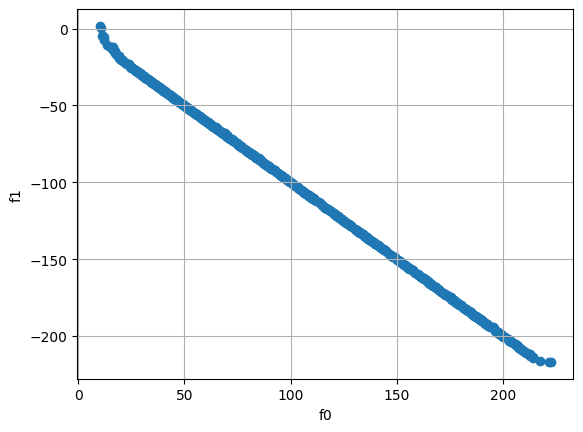

In [16]:
opt.plot_front(pruned)